In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.collections import LineCollection

rng = np.random.default_rng(seed=0)

In [2]:
cos_list = [np.cos(x * 2 * np.pi / 5) for x in np.arange(5)]
sin_list = [np.sin(x * 2 * np.pi / 5) for x in np.arange(5)]

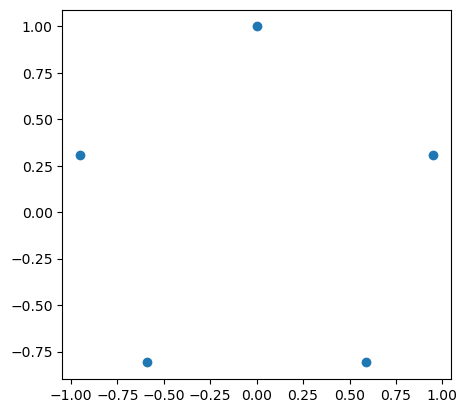

In [4]:
fig, ax = plt.subplots()
ax.scatter(sin_list, cos_list)
ax.set_aspect('equal')
plt.show()

In [9]:
offsets = rng.uniform(size=5)
offsets = offsets / np.sum(offsets)

offsets = np.array([.2, .2, .2, .2, .2])

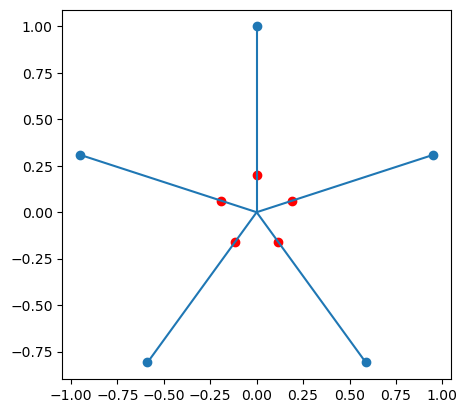

In [10]:
fig, ax = plt.subplots()
ax.scatter(sin_list, cos_list)

lines = [[(0, 0), (s, c)] for s, c in zip(sin_list, cos_list)]
ax.add_collection(LineCollection(lines))

ax.scatter(sin_list * offsets, cos_list * offsets, color='red')
ax.set_aspect('equal')
plt.show()

In [11]:
slopes = [-(s/c) for c,s in zip(cos_list, sin_list)]
slopes

[-0.0,
 -3.077683537175253,
 0.7265425280053611,
 -0.7265425280053608,
 3.077683537175256]

In [12]:
lines

[[(0, 0), (0.0, 1.0)],
 [(0, 0), (0.9510565162951535, 0.30901699437494745)],
 [(0, 0), (0.5877852522924732, -0.8090169943749473)],
 [(0, 0), (-0.587785252292473, -0.8090169943749475)],
 [(0, 0), (-0.9510565162951536, 0.30901699437494723)]]

In [13]:
def determine_y(x, px, py, slope=None, default=0):
    if slope is None:
        return default
    else: 
        return slope*(x - px) + py

lines = []
for s, c, o, slope in zip(sin_list, cos_list, offsets, slopes):
    p1 = (-5, determine_y(-5, s*o, c*o, slope))
    p2 = (5, determine_y(5, s*o, c*o, slope))
    lines.append([p1, p2])

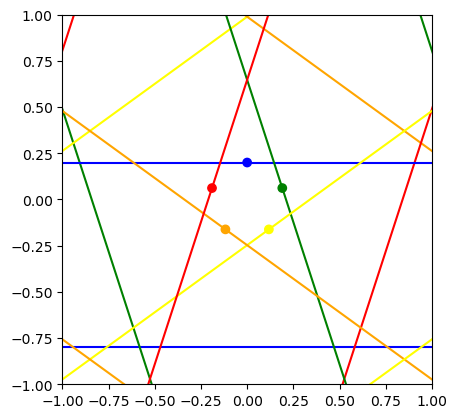

In [16]:
colors = ["blue", "green", "yellow", "orange", "red"]

fig, ax = plt.subplots()
ax.add_collection(LineCollection(lines, colors = colors))

ax.scatter(sin_list * offsets, cos_list * offsets, color=colors)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
plt.show()

In [15]:
lines = []
for x in np.arange(-3, 3):
    for s, c, o, slope in zip(sin_list, cos_list, offsets, slopes):
        p1 = (-5, determine_y(-5, s*(o+x), c*(o+x), slope))
        p2 = (5, determine_y(5, s*(o+x), c*(o+x), slope))
        lines.append([p1, p2])

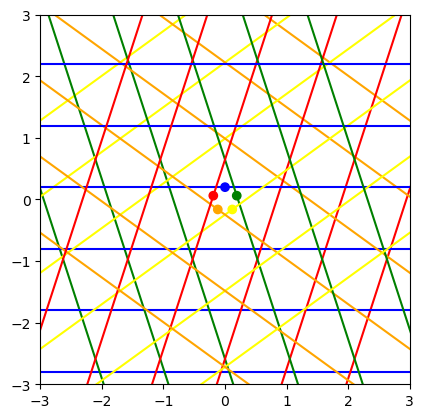

In [19]:
fig, ax = plt.subplots()
ax.add_collection(LineCollection(lines, colors = colors))

ax.scatter(sin_list * offsets, cos_list * offsets, color=colors)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
plt.show()

In [55]:
# Determine intersections
# This needs to be made into a class to handle /0 exceptions
def intersection(l0, l1):
    p = l0[0]
    r = (l0[1] - l0[0])

    q = l1[0]
    s = (l1[1] - l1[0])

    denom = (np.cross(r, s))
    if denom != 0:
        t = np.cross(q - p, s)/denom
        return p + t*r
    else:
        return False
    

In [56]:
intersection([np.asarray(lines[2][0]), np.asarray(lines[2][1])],
             [np.asarray(lines[5][0]), np.asarray(lines[5][1])])

array([-7.24113198, -1.8       ])

In [68]:
from itertools import product
intersections = [intersection([np.asarray(pair[0][0]), np.asarray(pair[0][1])],
                  [np.asarray(pair[1][0]), np.asarray(pair[1][1])]) 
                  for pair in product(lines, lines)]
intersections = [i for i in intersections if i is not False]
intersections

[array([-2.03431908, -2.8       ]),
 array([-8.6175139, -2.8      ]),
 array([ 8.6175139, -2.8      ]),
 array([ 2.03431908, -2.8       ]),
 array([-0.98285685, -2.8       ]),
 array([-6.91621229, -2.8       ]),
 array([ 6.91621229, -2.8       ]),
 array([ 0.98285685, -2.8       ]),
 array([ 0.06860537, -2.8       ]),
 array([-5.21491067, -2.8       ]),
 array([ 5.21491067, -2.8       ]),
 array([-0.06860537, -2.8       ]),
 array([ 1.12006759, -2.8       ]),
 array([-3.51360905, -2.8       ]),
 array([ 3.51360905, -2.8       ]),
 array([-1.12006759, -2.8       ]),
 array([ 2.17152982, -2.8       ]),
 array([-1.81230744, -2.8       ]),
 array([ 1.81230744, -2.8       ]),
 array([-2.17152982, -2.8       ]),
 array([ 3.22299204, -2.8       ]),
 array([-0.11100582, -2.8       ]),
 array([ 0.11100582, -2.8       ]),
 array([-3.22299204, -2.8       ]),
 array([-2.03431908, -2.8       ]),
 array([-3.29159741,  1.06950483]),
 array([-5.32591649,  7.33049517]),
 array([ 8.88178420e-16, -9.0609

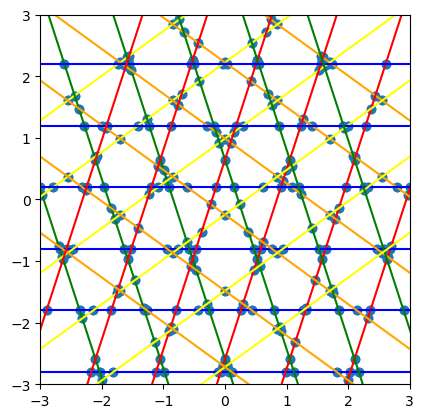

In [70]:
xs = [p[0] for p in intersections]
ys = [p[1] for p in intersections]

fig, ax = plt.subplots()

ax.add_collection(LineCollection(lines, colors = colors))

ax.scatter(xs, ys)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
plt.show()